# Assignment 3

Group members:

Changrui Dong 03677631

Xiaohan Liu 03657359

Yi Zhang 03671544

Ziqin Xu  03677351

In [51]:
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
from imageio import imread
from PIL import Image
import os  
import random

In [52]:
def linear_pca(X, k):
    mu=np.mean(X,axis=1)
    X_c=X-np.expand_dims(mu,axis=1)
    [U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)
    S=np.expand_dims(Sigma[:k],axis=1)*VT[:k,:]
    return S


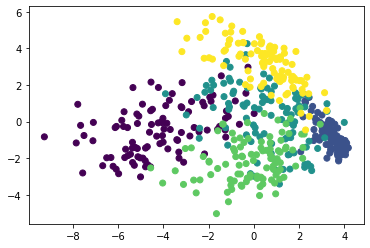

In [53]:
# Subtask 1.1
def read_data(num_classes, num_samples_each_class):
    dic=["mnist/d0/","mnist/d1/","mnist/d2/","mnist/d3/","mnist/d4/","mnist/d5/","mnist/d6/","mnist/d7/","mnist/d8/","mnist/d9/"];
    test_data=[]
    test_label=[]

    for i in range(0,num_classes):      
            for file in os.listdir(dic[i])[:num_samples_each_class]: #pick out random number of images
                im = imread(dic[i]+file) #size of im=784
                im = np.array(im)
                im = np.reshape(im,(784,1)) #reshape image into a column vector
                test_data.append(im/255); #read all images in subfolders and append them to lists
                test_label.append(int(file[1])) #read labels

    test_data=np.array(test_data).reshape(num_classes*num_samples_each_class, 784).T
    test_label=np.array(test_label)
    return test_data, test_label

num_samples_each_class=100 #number of samples from each file
num_classes=5; #number of classes, can be changed
k=2 #first k PCA scores
test_data, test_label = read_data(num_classes,num_samples_each_class) #read images from the file
pca_linear2=linear_pca(test_data, k) #do linear PCA
plt.scatter(pca_linear2[0, :], pca_linear2[1, :],c=test_label) #visualize the scatter plot
plt.show()

In [54]:
# Subtask 1.2
def gram_pca(K,k):
    K = np.array(K)
    n = K.shape[0] # Get number of data point
    H = np.eye(n)-(1/n)*np.ones((n, n))
    K_cen = H.dot(K).dot(H) # Compute the centered K using matrix H
    w,v = np.linalg.eig(K_cen) # EVD
    idx = np.argsort(-w)
    w = w[idx] # Sort the eigenvalues of K_cen (descending)
    v = v[:,idx] # Sort the eigenvectors of K_cen accordingly
    Sigma_k = np.diag(np.sqrt(w[:k]))
    Sigma_k_inv = np.linalg.inv(Sigma_k)
    S = Sigma_k_inv.dot(v[:,:k].T).dot(K_cen) # Compute the first k scores for the centered gram matrix K_cen
    return S

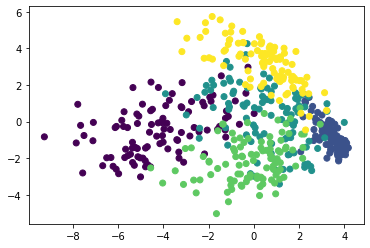

In [55]:
# Subtask 1.3
# Compute the gram matrix K
K=test_data.T.dot(test_data) #calculate the Gram-matrix
# Do gram PCA
pca_gram2 = gram_pca(K, k) 

# Visualize the scatter plot
plt.scatter(pca_gram2[0, :], pca_gram2[1, :],c=test_label) 
plt.show()

In [56]:
# Subtask 1.4
def compute_gaussian_gram_matrix(X, sigma):
    n=X.shape[1] # Number of data point
    K=np.ones((n,n))
    for i,x in enumerate(X.T):
        for j,y in enumerate(X.T):
            K[i,j]=np.exp(-1*np.linalg.norm(x-y)**2/(2*sigma**2)) # Compute K using the Gaussian kernel
    return K

def gaussian_kernel_pca(X, k, sigma):
    K=compute_gaussian_gram_matrix(X,sigma)
    S=gram_pca(K,k)
    return S

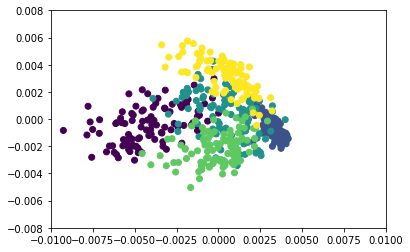

In [58]:
# Subtask 1.5
# Do Gaussian kernel PCA
sigma = 1000
pca_kernel2 = gaussian_kernel_pca(test_data, k, sigma) 
plt.xlim(-0.010, 0.010)
plt.ylim(-0.008, 0.008)
# Visualize the scatter plot
plt.scatter(pca_kernel2[0, :], pca_kernel2[1, :],c=test_label) 
plt.show()